# Draw a map of EU memberstates and participating countries

## Get data

In [4]:
import os
#fname = 'ne_10m_admin_0_boundary_lines_land.zip'
fname = 'TM_WORLD_BORDERS-0.3.zip'
shpname = fname[:-4] + '.shp'
if not os.path.exists(fname):
    if not os.path.exists(shpname):
        # get data
        #!wget http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
        !wget http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
            
cmd = "unzip " + fname
os.system(cmd)
os.system('rm ' + fname)
!ls

countries.png  europe_map.ipynb  TM_WORLD_BORDERS-0.3.dbf  TM_WORLD_BORDERS-0.3.shp
countries.txt  Readme.txt	 TM_WORLD_BORDERS-0.3.prj  TM_WORLD_BORDERS-0.3.shx


## Do plotting

In [3]:

from matplotlib.collections import LineCollection
import numpy as np


import matplotlib.pyplot as plt


    


        


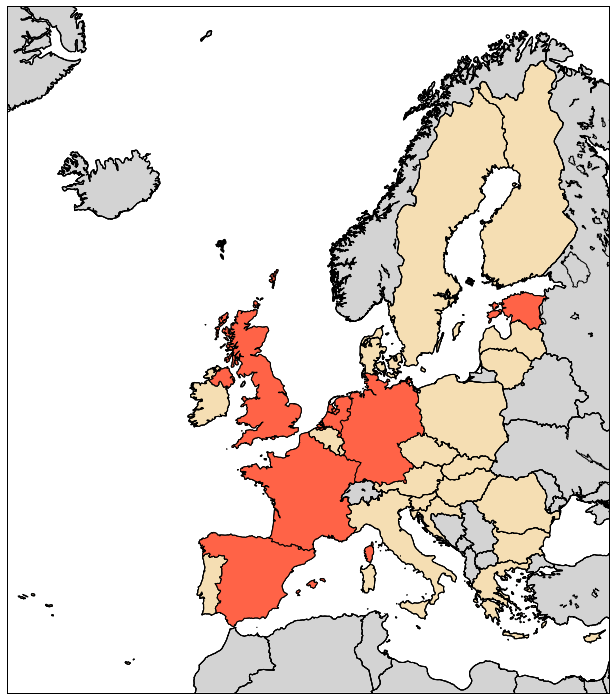

In [5]:
%matplotlib inline
# create map
M = Map()
M.read_shape(shpname)
M.draw()
d=np.loadtxt('countries.txt', skiprows=1, dtype='str', delimiter='\t')
memberstates=[]
for r in d:
    memberstates.append(r)

M.draw_details(memberstates, color='wheat')  # plot EU memberstates
M.draw_details(['France', 'Germany','United Kingdom','Netherlands', 'Estonia', 'Spain'], color='tomato')  # plot some more countries

M.ax.figure.savefig('countries.png', dpi=200, bbox_inches='tight')